Shape of x-axis of dataset
(4279, 144)
Shape of y-axis of dataset
(4279, 1)
---------------------------------------------------------
Lets visualize the dataset first
0 = Unbound
1 = Bound
Larger numbers = Molecular Weight


C:\Users\kelly\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\kelly\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Model Accuracy: 0.996875 
Model Precision: 1.0 
Model Recall (sensitivity): 0.6 
Model F1 (test accuracy): 0.7499999999999999 
ACCURACY:  -1.2173228346456693
Confusion Matrix: 
 [[626   9]
 [  2   3]]
PREDICTION: ACTIVE


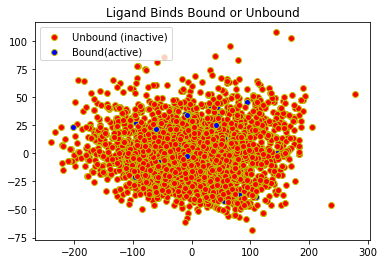

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import plotly.express as px

from sklearn import *
from sklearn.model_selection import *
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.metrics import *


dataset = pd.read_csv('AID362 dataset.csv')
# get first row using head() function

#dataset has last column as "Outcome" which is a boolean for whether the connection is Bound (active) or Unbound(inactive)
def isActive(i):
    if i == 'Inactive':
        return 0
    else:
        return 1

# the label for the data is the "Outcome" column which applies the definition created previously
dataset['label'] = dataset['Outcome'].apply(isActive)

# dataset manipulation 

# .iloc :: integer location from - 0 to length-1 of axis. 
# [4000, :] is from 4000 to end of numbers in dataset along x-axis as well as y-axis. 

# .drop removes labels from rows and columns of dataset. 
# axis can be either 'columns' or 1. chose string for clarity.
X = dataset.drop(['Outcome','label'],axis='columns')
X_values = X.iloc[:4000,:].values
y = dataset[['label']]
y_values = y.iloc[:4000,:].values

print("Shape of x-axis of dataset")
print(X.shape)
print("Shape of y-axis of dataset")
print(y.shape)
print('---------------------------------------------------------')

# for loop to iterate through the dataset and build the model on each tuple within the dataset
# numpy.arrange (np.arrange) returns evenly spaced values within a given interval
# the three parameters are (start, stop, step)
for i in np.arange(0,1,1):
    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.16,random_state=7,shuffle=True,stratify=None)

    #ExtraTreesClassifier class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees)
    # on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
    dasModel = ExtraTreesClassifier(n_estimators=23,criterion="gini",max_features="auto",random_state=131)

    #build a forest of trees from the training set.
    dasModel.fit(X_train, y_train.ravel())

    prediction = dasModel.predict(X_test)

    accuracy_score(y_pred=prediction, y_true=y_test)

    print("Lets visualize the dataset first")
    print('0 = Unbound\n1 = Bound')
    print("Larger numbers = Molecular Weight")

    fig1 = px.treemap(dataset, path=['MW', 'BBB'],
                      values='label',
                      color_continuous_scale=["orange", "red","green", "blue","purple"])
    fig1.show()


    print("Model Accuracy: {0} "
          .format(accuracy_score(y_pred=prediction, y_true=y_test)))
    
    print("Model Precision: {0} "
          .format(precision_score(y_pred=prediction, y_true=y_test)))
   
    #print the model recall which is the fraction of relevant instances that were retrieved. fraction
    # of relevant instances among the retrieved instances
    
    print("Model Recall (sensitivity): {0} "
          .format(recall_score(y_pred=prediction, y_true=y_test)))
    #print the calculation of precision and recall of the test.  where the precision is the number of 
    # true positive results divided by the number of all positive results, including those not identified 
    # correctly, and the recall is the number of true positive results divided by the number of all samples 
    # that should have been identified as positive
    
    print("Model F1 (test accuracy): {0} "
          .format(f1_score(y_pred=prediction, y_true=y_test)))


    #PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to 
    #project it to a lower dimensional space. The input data is centered but not scaled
    #for each feature before applying the SVD.
    DaPCA = PCA(n_components=2).fit(X_train)
    DaPCA_2d = DaPCA.transform(X_train)

    # for loop to create the scatterplot datapoints
    for i in range(0, DaPCA_2d.shape[0]):
        if y_train[i] == 0:
            c1 = pl.scatter(DaPCA_2d[i, 0], DaPCA_2d[i, 1], color='red', edgecolors='y', marker='o',
                            linewidths=1)

        elif y_train[i] == 1:
            c2 = pl.scatter(DaPCA_2d[i, 0], DaPCA_2d[i, 1], color='blue', edgecolors='y', marker='o',
                            linewidths=1)
    

    pl.legend([c1, c2], ['Unbound (inactive)', 'Bound(active)'])
    plt.title('Ligand Binds Bound or Unbound')
    
    

    
    derRegressionPrediction = ExtraTreesRegressor(criterion="squared_error",max_features="auto",
                                                     n_jobs=-1,n_estimators=1)
    

    # used .ravel() for y_train since ExtraTreesRegressor expects a shape of (n,) and gives the warning:
    #   "DataConversionWarning: A column-vector y was passed when a 1d array was expected. 
    #   Please change the shape of y to (n_samples,), for example using ravel()."
    # was given. This flattens the array that has been passed. (Stack Overflow is wonderful lol)
    derRegressionPrediction.fit(X_train,y_train.ravel())

    predict_regress = derRegressionPrediction.predict(X_test)

    

    print('\033[1m' + "ACCURACY: "+ '\033[0m', r2_score(y_test,predict_regress) )
    print("Confusion Matrix: \n",confusion_matrix(y_test,predict_regress))
   


    while True:
        prediction = derRegressionPrediction.predict(X.values[:1])
        arrayPrediction = np.array(prediction)
        makeListPrediction = arrayPrediction.tolist()

        if makeListPrediction == [0]:
            print('\033[1m' + "PREDICTION: INACTIVE" + '\033[0m')
            break
        elif makeListPrediction == [1]:
            print('\033[1m' + 'PREDICTION: ACTIVE' + '\033[0m')
            break


